In [67]:
import numpy as np
import robosuite as suite
from robosuite.controllers import load_controller_config

In [99]:
controller_config = load_controller_config(default_controller="OSC_POSE")

# create environment instance
env = suite.make(
    env_name="Stack", # try with other tasks like "Stack" and "Door"
    robots="Sawyer",  # try with other robots like "Sawyer" and "Jaco"
    has_renderer=True,  # can set to false for training
    # controller_configs=controller_config,
    render_camera="frontview",
    has_offscreen_renderer=True,
    use_object_obs=True,
    use_camera_obs=True,
    camera_names="agentview",
    camera_heights=84,
    camera_widths=84
)

# reset the environment
env.reset()
imgs = []
for i in range(1000):
    action = np.random.randn(8) # sample random action
    obs, reward, done, info = env.step(action)  # take action in the environment
    # print(reward)
    imgs.append(obs["agentview_image"])
    if i == 29:
        break
    env.render()  # render on display

In [66]:
env.robots[0].action_dim

8

In [47]:
print(f"Action dimension={env.robots[0].action_dim}")
print(f"Action value (LB/UB)={env.robots[0].action_limits}")

Action dimension=8
Action value (LB/UB)=(array([-1., -1., -1., -1., -1., -1., -1., -1.]), array([1., 1., 1., 1., 1., 1., 1., 1.]))


In [50]:
env.robots[0].control

<bound method SingleArm.control of <robosuite.robots.single_arm.SingleArm object at 0x15e5a8a00>>

In [46]:
env.robots[0].action_limits[1]

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [33]:
obs.keys()


odict_keys(['robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'agentview_image', 'cubeA_pos', 'cubeA_quat', 'cubeB_pos', 'cubeB_quat', 'gripper_to_cubeA', 'gripper_to_cubeB', 'cubeA_to_cubeB', 'robot0_proprio-state', 'object-state'])

In [88]:
obs["cubeA_pos"]

array([-0.07333178,  0.04182706,  0.81978449])

In [89]:
obs["cubeB_pos"] # green

array([-0.02626404, -0.0518512 ,  0.82478449])

In [58]:
obs["cubeA_pos"]

array([0.06356447, 0.00408205, 0.81978449])

In [34]:
obs["agentview_image"].shape

(84, 84, 3)

<Figure size 640x480 with 0 Axes>

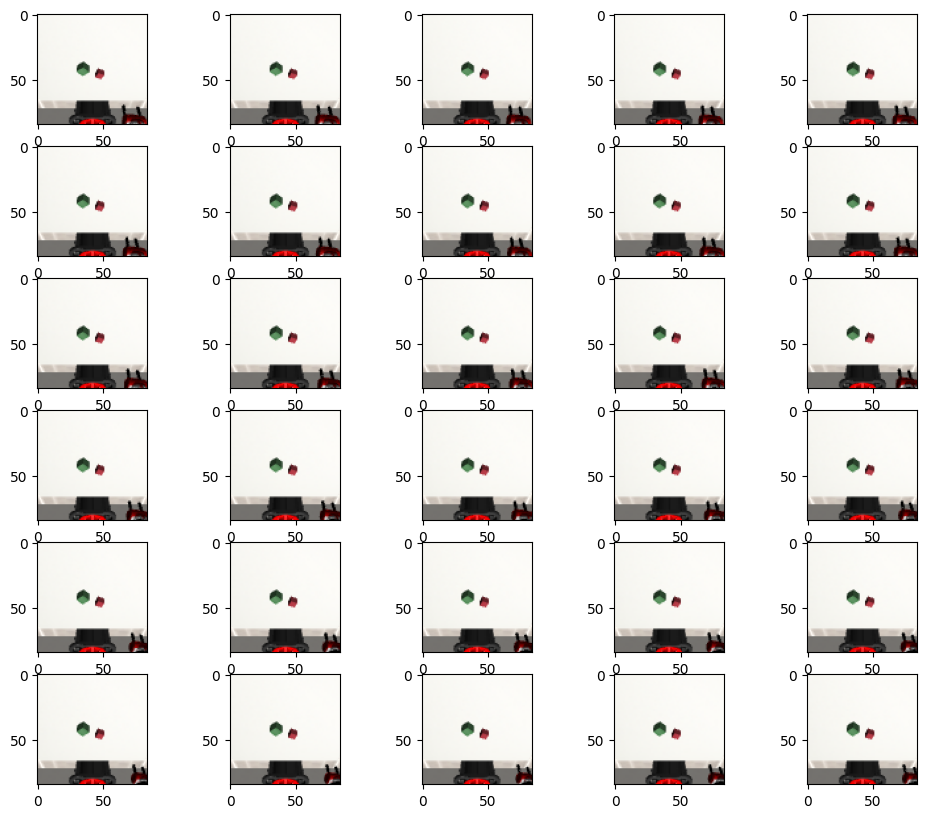

In [76]:
import matplotlib.pyplot as plt
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(6,5, figsize=(12, 10))

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(len(imgs)):
    axarr[(i // 5, i % 5)].imshow(imgs[i])